In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

wk_incomes = pd.read_csv('Data/wk_incomes.csv')
wk_incomes= wk_incomes.drop('Unnamed: 0', 1)

wk_incomes.head()

,Residence,Gender,Age,Literacy,Scholarship,Career,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Monthly Income
0,Ciudad de México,Hombre,30,Sí,Profesional,Planes multidisciplinarios o generales del cam...,Está soltero(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,16000.0
1,Ciudad de México,Hombre,31,Sí,Profesional,Informática,Vive con su pareja en unión libre,Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,12000.0
2,Ciudad de México,Mujer,26,Sí,Profesional,Derecho,Vive con su pareja en unión libre,Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores por cuenta propia,Comercio,8000.0
3,Ciudad de México,Mujer,60,Sí,Preparatoria o bachillerato,NaN,Está soltero(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,25000.0
4,Ciudad de México,Mujer,34,Sí,Profesional,Derecho,Está soltero(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,8000.0


In [2]:
wk_incomes['Monthly Income'].describe()

count    126055.000000
mean       8131.892706
std        7380.446417
min           0.000000
25%        4300.000000
50%        6880.000000
75%       10000.000000
max      300000.000000
Name: Monthly Income, dtype: float64

In [5]:
wk_incomes['Income Level']= wk_incomes['Monthly Income']
level_1 = wk_incomes['Income Level'].quantile(.10)
level_2 = wk_incomes['Income Level'].quantile(.20)
level_3 = wk_incomes['Income Level'].quantile(.30)
level_4 = wk_incomes['Income Level'].quantile(.40)
level_5 = wk_incomes['Income Level'].quantile(.50)
level_6 = wk_incomes['Income Level'].quantile(.60)
level_7 = wk_incomes['Income Level'].quantile(.70)
level_8 = wk_incomes['Income Level'].quantile(.80)
level_9 = wk_incomes['Income Level'].quantile(.90)

In [11]:
wk_incomes.loc[(wk_incomes['Monthly Income'] <= level_1, 'Income Level')] = 'Level 1'
wk_incomes.loc[((wk_incomes['Monthly Income'] <= level_2) & (wk_incomes['Monthly Income'] > level_1), 'Income Level')] = 'Level 2'
wk_incomes.loc[((wk_incomes['Monthly Income'] <= level_3) & (wk_incomes['Monthly Income'] > level_2), 'Income Level')] = 'Level 3'
wk_incomes.loc[((wk_incomes['Monthly Income'] <= level_4) & (wk_incomes['Monthly Income'] > level_3), 'Income Level')] = 'Level 4'
wk_incomes.loc[((wk_incomes['Monthly Income'] <= level_5) & (wk_incomes['Monthly Income'] > level_4), 'Income Level')] = 'Level 5'
wk_incomes.loc[((wk_incomes['Monthly Income'] <= level_6) & (wk_incomes['Monthly Income'] > level_5), 'Income Level')] = 'Level 6'
wk_incomes.loc[((wk_incomes['Monthly Income'] <= level_7) & (wk_incomes['Monthly Income'] > level_6), 'Income Level')] = 'Level 7'
wk_incomes.loc[((wk_incomes['Monthly Income'] <= level_8) & (wk_incomes['Monthly Income'] > level_7), 'Income Level')] = 'Level 8'
wk_incomes.loc[((wk_incomes['Monthly Income'] <= level_9) & (wk_incomes['Monthly Income'] > level_8), 'Income Level')] = 'Level 9'
wk_incomes.loc[((wk_incomes['Monthly Income'] > level_9), 'Income Level')] = 'Level 10'
wk_incomes

,Residence,Gender,Age,Literacy,Scholarship,Career,Marital Status,Urban or Rural,Economic Zone,By Position,By Economic Sector,Monthly Income,Income Level
0,Ciudad de México,Hombre,30,Sí,Profesional,Planes multidisciplinarios o generales del cam...,Está soltero(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,16000.0,Level 10
1,Ciudad de México,Hombre,31,Sí,Profesional,Informática,Vive con su pareja en unión libre,Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,12000.0,Level 9
2,Ciudad de México,Mujer,26,Sí,Profesional,Derecho,Vive con su pareja en unión libre,Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores por cuenta propia,Comercio,8000.0,Level 6
3,Ciudad de México,Mujer,60,Sí,Preparatoria o bachillerato,NaN,Está soltero(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,25000.0,Level 10
4,Ciudad de México,Mujer,34,Sí,Profesional,Derecho,Está soltero(a),Muestra urbana,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,8000.0,Level 6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126050,Zacatecas,Mujer,24,Sí,Secundaria,NaN,Está soltero(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Comercio,2150.0,Level 2
126051,Zacatecas,Hombre,62,Sí,Primaria,NaN,Está casado(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Construcción,7740.0,Level 6
126052,Zacatecas,Mujer,31,Sí,Preparatoria o bachillerato,NaN,Está viudo(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Servicios,7740.0,Level 6
126053,Zacatecas,Mujer,18,Sí,Preparatoria o bachillerato,NaN,Está soltero(a),Muestra complemento y rural,Zona 2 Resto del paÃ­s,Trabajadores subordinados y remunerados,Comercio,7955.0,Level 6


In [15]:
wk_incomes['Income Level'].value_counts()

Level 3     18330
Level 5     13900
Level 1     13778
Level 6     12985
Level 9     12869
Level 10    12081
Level 8     11815
Level 2     11433
Level 7     11212
Level 4      7652
Name: Income Level, dtype: int64

In [16]:
wk_incomes['Income Level'].describe()

count      126055
unique         10
top       Level 3
freq        18330
Name: Income Level, dtype: object

In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [18]:
y = wk_incomes['Income Level']
X = wk_incomes.drop(columns=['Monthly Income', 'Income Level'], axis=1)

rel_columns = ['Age','Gender', 'Literacy', 'Scholarship','Career', 'Marital Status', 'Urban or Rural', 'Residence','Economic Zone', 'By Position','By Economic Sector']
X = pd.get_dummies(X[rel_columns], drop_first=True, dtype=float)

scaler = MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X),
            columns=X.columns, index=X.index) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

In [19]:
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [20]:
y_preds = clf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_preds))

Accuracy:  0.22820424676732687


In [ ]:
### Decision Tree Clasifies with gini

In [21]:
target = wk_incomes['Income Level']
data = wk_incomes.drop(columns=['Monthly Income', 'Income Level'], axis=1)


rel_columns = ['Age','Gender', 'Literacy', 'Scholarship','Career', 'Marital Status', 'Urban or Rural', 'Residence','Economic Zone', 'By Position','By Economic Sector']
data = pd.get_dummies(data[rel_columns], drop_first=True, dtype=float)

scaler = MinMaxScaler()
data=pd.DataFrame(scaler.fit_transform(data),
            columns=data.columns, index=data.index) 

data_train, data_test, target_train, target_test = train_test_split(data, target, 
                                                                    test_size = 0.25, random_state=123)

# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=5)

In [22]:
# Feature importance
tree_clf.feature_importances_

array([0.03168284, 0.07719607, 0.        , 0.        , 0.04374906,
       0.        , 0.        , 0.        , 0.11253773, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

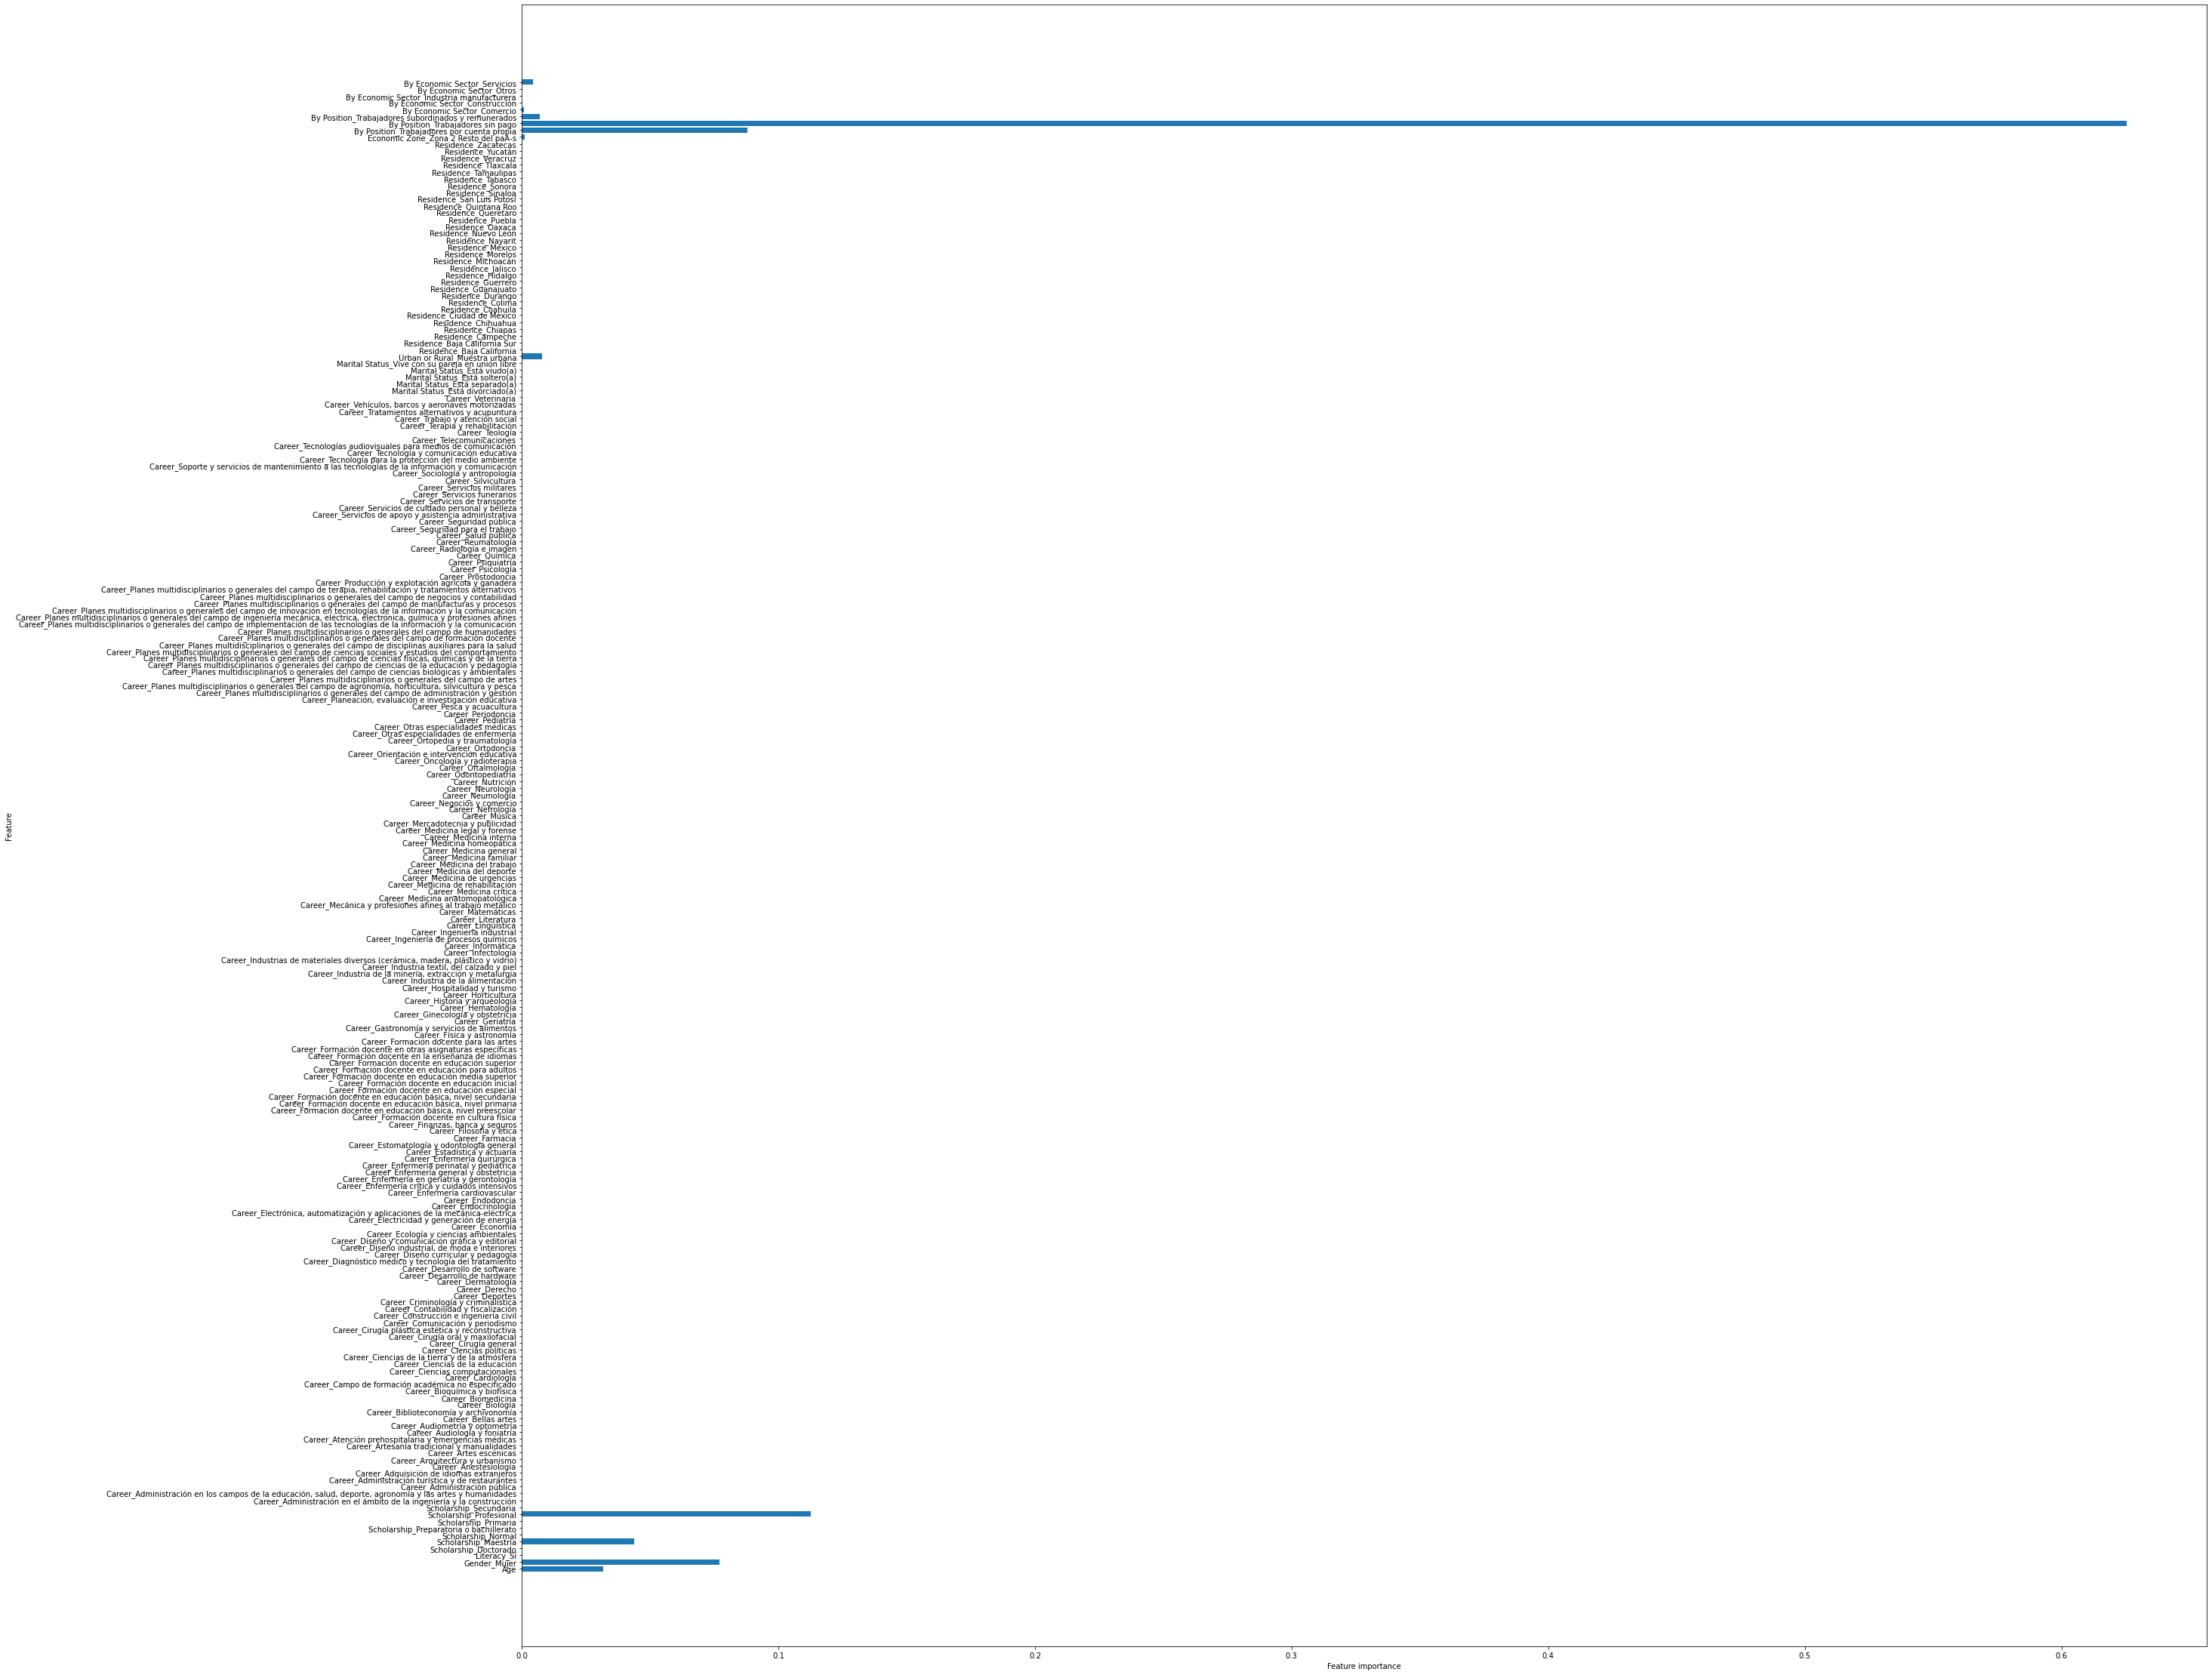

In [23]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(40,40))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [24]:
# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

[[2304   43  198  544    0  292    0    0    0   21]
 [  86 1458   61  414    0  906    0    0    3   72]
 [ 615  150  251 1158    0  690    0    0    3   41]
 [ 471  307  217 1890    0 1666    0    0   11   69]
 [ 103  279   40  687    0  779    0    0    4   40]
 [ 194  239  102 1293    0 1573    0    0    4   40]
 [ 104  543   47  948    0 1476    0    0   11   85]
 [ 195  399   80  719    0 1304    0    0    8   50]
 [ 125  773   74  662    0 1322    0    0    6   62]
 [ 126 1252   87  493    0 1143    0    0    4   98]]


C:\Users\dfloresalbores\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Level 1       0.53      0.68      0.60      3402
    Level 10       0.27      0.49      0.35      3000
     Level 2       0.22      0.09      0.12      2908
     Level 3       0.21      0.41      0.28      4631
     Level 4       0.00      0.00      0.00      1932
     Level 5       0.14      0.46      0.22      3445
     Level 6       0.00      0.00      0.00      3214
     Level 7       0.00      0.00      0.00      2755
     Level 8       0.11      0.00      0.00      3024
     Level 9       0.17      0.03      0.05      3203

    accuracy                           0.24     31514
   macro avg       0.17      0.21      0.16     31514
weighted avg       0.18      0.24      0.18     31514

Testing Accuracy for Decision Tree Classifier: 24.05%


In [25]:
## Bagging
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=50)
# Fit to the training data
bagged_tree.fit(data_train, target_train)

# Training accuracy score
bagged_tree.score(data_train, target_train)

0.25240900773209507

In [26]:
# Test accuracy score
bagged_tree.score(data_test, target_test)

0.2467157453830044

In [27]:
## Random Forest

# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)
# Training accuracy score
forest.score(data_train, target_train)

0.25330808855417225

In [28]:
# Test accuracy score
forest.score(data_test, target_test)

0.25264961604366315

## Pruning

In [29]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf2 = DecisionTreeClassifier(criterion='gini', min_samples_split=8, max_depth=100, splitter='best', min_samples_leaf= 100) 
tree_clf2.fit(data_train, target_train)

tree_clf2.score(data_train, target_train)

0.30794047027215704

In [30]:
tree_clf2.score(data_test, target_test)

0.279272704194961

In [31]:
# Instantiate a BaggingClassifier
bagged_tree2 =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', min_samples_split=8, max_depth=100, splitter='best', min_samples_leaf= 100), 
                                 n_estimators=20)
# Fit to the training data
bagged_tree2.fit(data_train, target_train)

# Training accuracy score
bagged_tree2.score(data_train, target_train)

0.30660771517119556

In [32]:
# Test accuracy score
bagged_tree2.score(data_test, target_test)

0.2828584121342895